<a href="https://colab.research.google.com/github/zackoflonely/028_Zaki-Fauzan_PO2_DatMin/blob/main/028_Zaki_Fauzan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Zaki Fauzan Rabbani**

**Kelas : A 2021**

**NIM : 2109116006**

**Ketentuan Tugas 1 Penggalian Data dan Analitika Proses Bisnis**

1.Buatlah analisis menggunakan dataset retail, 

2.tampilkan kombinasi barang dengan metode apriori

3.lakukan forcasting  3 month Customer Lifetime Value

terdapat 34 kategori berdasarkan BRANCHNAME_SPLR, jadi 1 kategori dilakukan oleh 1 atau 2 orang

pembagiannya terserah kalian

BRANCHNAME_SPLR = MAKASSAR

#**1.Analisis Dataset Retail**

Analisis asosiasi atau association rule mining adalah teknik data mining untuk menemukan aturan assosiatif antara suatu kombinasi item (Mengetahui hubungan antara satu atribut dengan yang lainnya). Analisis asosiasi biasa digunakan untuk mengidentifikasi hubungan atau pola dalam data transaksional atau data yang berisi himpunan item atau variabel yang muncul bersama. Tujuan utama dari analisis asosiasi adalah mengungkapkan keterkaitan atau hubungan antara item-item dalam dataset yang sering muncul bersama. Contoh aturan assosiatif dari analisa pembelian di suatu pasar swalayan contohnya adalah dapat diketahuinya berapa besar kemungkinan seorang pelanggan membeli roti bersamaan dengan susu. Dengan pengetahuan tersebut pemilik pasar swalayan dapat mengatur penempatan barangnya atau merancang kampanye pemasaran dengan memakai kupon diskon untuk kombinasi barang tertentu.

Terdapat tahapan dalam analisis, yaitu:
1. Data Selection
2. Data Pre-processing
3. Data Mining
4. Interpretation/evaluation

##Data Selection

In [1]:
# Menyambungkan ke gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import datetime

In [5]:
# Import dataset
df = pd.read_excel('/content/drive/MyDrive/Datmin-028-ZakiFauzan/data_retail2.xlsx')

In [6]:
# Tampilkan data
df

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
0,536365,2020-12-01 08:26:00,13,SAMARINDA,10001,8992753282401,85123A,123 BENDERA COKLAT 300G,SUSU,6,...,17850.0,DUA PUTRI SLAMET RIYADI,JL. SLAMET RIYADI,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
1,536365,2020-12-01 08:26:00,13,SAMARINDA,20020,8999909192034,71053,2.3.4 FILTER,ROKOK,6,...,17850.0,SANURI,JL. M. SAID,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
2,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20021,8999909007147,84406B,234 KERETEK,ROKOK,8,...,17850.0,EMI MBAK,PS. TALUN NO.63,MAGELANG,JAWA TENGAH,INDONESIA,32,Toko Kelontong,190105,PT. KTRI DISTRIBUSI
3,536365,2020-12-01 08:26:00,13,SAMARINDA,20018,8999909172234,84029G,234 KERETEK 12,ROKOK,6,...,17850.0,RISKA CELL ADAM MALIK,JL. ADAM MALIK,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
4,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20019,8999909005860,84029E,234 KERETEK 16,ROKOK,6,...,17850.0,ABADI MART,JL.GROWONG - PUCUNG REJO MUNTILAN.,MAGELANG,JAWA TENGAH,INDONESIA,42,Mini Market,190105,PT. KTRI DISTRIBUSI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2021-12-09 12:50:00,22,MALANG,K0336,8888166603240,22613,KG CHOCO SHORT CAKE 225G,BISKUIT,12,...,12680.0,KPRI DIAN HUSADA (DINAS KESEHATAN),JLN SIMPANG LA SUCIPTO NO 45,MALANG,JAWA TIMUR,INDONESIA,45,Koperasi,220109,PT. KOTAK AGRO SUBUR
541905,581587,2021-12-09 12:50:00,22,MALANG,K1923,8888166993044,22899,KG CHOCO WAY FINGER 33G,BISKUIT,6,...,12680.0,ASSALAM,JLN TELUK BAYUR NO 59,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR
541906,581587,2021-12-09 12:50:00,22,MALANG,K0290,8888166336841,23254,KG CISSY 120G CRACKER,BISKUIT,4,...,12680.0,RAHMA TK,JLN SANAN NO. 1A/14 (BLKG LAPAS),MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR
541907,581587,2021-12-09 12:50:00,22,MALANG,K3270,8991102023986,23255,KIDDO JUNIOR,PASTA & S-GIGI,4,...,12680.0,KARUNIA,PERUM SUKUN PONDOK INDAH N-9,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR


In [7]:
# Buat dataset dengan label target 'Makassar'
df2 = df[df["BRANCHNAME_SPLR"]=="MAKASSAR"]

In [8]:
dfnew = pd.DataFrame(df2)

In [9]:
dfnew

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
33,536370,2020-12-01 08:45:00,9,MAKASSAR,A2404,711844160071,21035,ABC JUICE JAMBU 250ML,MINUMAN,18,...,12583.0,TK.MAJU 9,PEKKABATA,PAREPARE,SULAWESI SELATAN,INDONESIA,32,Toko Kelontong,90146,PT. SUMATRA PUTRI FARMASI
153,536382,2020-12-01 09:45:00,9,MAKASSAR,A2702,8991916151011,22783,ACCESS MILD 10S,TANDAS,4,...,16098.0,KOPERASI PEGAWAI NEGERI PERINTIS (POLTEK) (P),PERINTIS KEMERDEKAAN KM 10 (KMPUS UNHAS) PERIN...,MAKASSAR,SULAWESI SELATAN,INDONESIA,45,Koperasi,90143,PT. CONGLING BINTANG PRATAMA
2639,536592,2020-12-01 17:06:00,9,MAKASSAR,B0950,8992727001922,22078,BIORE 40G FACIAL MILK MOISTURE,KOSMETIK,1,...,NaN,AKILA KENDARI,JL.BTN KENDARI PERMAI,KENDARI,SULAWESI TENGGARA,INDONESIA,32,Toko Kelontong,90147,PT. INTI JAYA
2640,536592,2020-12-01 17:06:00,9,MAKASSAR,B0958,8992727001939,22081,BIORE 80G FACIAL MILK MOISTURE,KOSMETIK,2,...,NaN,BEGADANG KS KENDARI,JL.AHMAD NASUTION,KENDARI,SULAWESI TENGGARA,INDONESIA,32,Toko Kelontong,90147,PT. INTI JAYA
2641,536592,2020-12-01 17:06:00,9,MAKASSAR,B0961,8992727002264,22082,BIORE ANTI ACNE 20G,KOSMETIK,6,...,NaN,KEN MART KENDARI,JL.BOULEVARD,KENDARI,SULAWESI TENGGARA,INDONESIA,42,Mini Market,90147,PT. INTI JAYA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310143,564167,2021-08-23 13:50:00,9,MAKASSAR,O0774,7622300442200,20711,OREO ICE CREAM ORANGE 29.4G,LAIN-LAIN,20,...,17735.0,FADILLAH / HASMUNIDAR,JL.SAWERIGADING SENGKANG,SENGKANG,SULAWESI SELATAN,INDONESIA,32,Toko Kelontong,90146,PT. SUMATRA PUTRI FARMASI
310144,564167,2021-08-23 13:50:00,9,MAKASSAR,O0773,7622300442392,21931,OREO ICE CREAM ORANGE 137G,BISKUIT,10,...,17735.0,KOP.POLRES,JL.BELIBIS NO.1,SENGKANG,SULAWESI SELATAN,INDONESIA,45,Koperasi,90146,PT. SUMATRA PUTRI FARMASI
310145,564167,2021-08-23 13:50:00,9,MAKASSAR,O0770,8993048140185,20712,OIL PASTELS 18W KIKO,STATIONERY,10,...,17735.0,FADIL (PONRE),DEKAT WARUNG ACE PONRE,BULUKUMBA,SULAWESI SELATAN,INDONESIA,32,Toko Kelontong,90146,PT. SUMATRA PUTRI FARMASI
310146,564167,2021-08-23 13:50:00,9,MAKASSAR,O0766,4902430359788,20713,OLAY TE 7 DAY CREAM NORMAL 20G,BISKUIT,20,...,17735.0,PT.MEGA INDAH SARI TIMOR,PEKKAE,PARE-PARE,SULAWESI SELATAN,INDONESIA,41,Super Market,90146,PT. SUMATRA PUTRI FARMASI


In [10]:
# Lihat tipe data
dfnew.dtypes

InvoiceNo                      object
InvoiceDate            datetime64[ns]
BRANCH_SPLR                     int64
BRANCHNAME_SPLR                object
warehouseProductsID            object
BARCODEID                       int64
StockCode                      object
PRODUCT                        object
PRODUCT_CATEGORY               object
Quantity                        int64
UnitPrice                     float64
UnitPriceRupiah               float64
oldCUSTID                      object
CustomerID                    float64
CUSTNAME                       object
ADDRESS                        object
KOTA                           object
PROVINSI                       object
NEGARA                         object
CHANNELID_SPLR                  int64
CHANNELNAME_SPLR               object
SUBDISTID                       int64
SUBDIST_NAME                   object
dtype: object

In [11]:
# Menampilkan info dataset (df.info())
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8504 entries, 33 to 310147
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   InvoiceNo            8504 non-null   object        
 1   InvoiceDate          8504 non-null   datetime64[ns]
 2   BRANCH_SPLR          8504 non-null   int64         
 3   BRANCHNAME_SPLR      8504 non-null   object        
 4   warehouseProductsID  8504 non-null   object        
 5   BARCODEID            8504 non-null   int64         
 6   StockCode            8504 non-null   object        
 7   PRODUCT              8504 non-null   object        
 8   PRODUCT_CATEGORY     8504 non-null   object        
 9   Quantity             8504 non-null   int64         
 10  UnitPrice            8504 non-null   float64       
 11  UnitPriceRupiah      8504 non-null   float64       
 12  oldCUSTID            8504 non-null   object        
 13  CustomerID           7638 non-

In [12]:
# Describe data
dfnew.describe()

,BRANCH_SPLR,BARCODEID,Quantity,UnitPrice,UnitPriceRupiah,CustomerID,CHANNELID_SPLR,SUBDISTID
count,8504.0,8.504000e+03,8504.000000,8504.000000,8.504000e+03,7638.000000,8504.000000,8504.000000
mean,9.0,8.127525e+12,11.294450,3.162280,4.522061e+04,15402.615213,39.077611,90144.550800
std,0.0,2.110239e+12,39.377125,5.765831,8.245139e+04,1685.171624,11.422379,1.795628
min,9.0,3.600000e+01,-192.000000,0.000000,0.000000e+00,12348.000000,14.000000,90143.000000
25%,9.0,8.886020e+12,2.000000,1.250000,1.787500e+04,14062.000000,32.000000,90143.000000
50%,9.0,8.992804e+12,6.000000,1.950000,2.788500e+04,15296.000000,34.000000,90143.000000
75%,9.0,8.996196e+12,12.000000,3.750000,5.362500e+04,16919.000000,42.000000,90146.000000
max,9.0,9.889987e+12,2000.000000,308.820000,4.416126e+06,18270.000000,92.000000,90147.000000


In [13]:
# Menampilkan kolom BRANCHNAME_SPLR
pd.unique(dfnew.BRANCHNAME_SPLR)

array(['MAKASSAR'], dtype=object)

In [14]:
dfnew.nunique()

InvoiceNo               903
InvoiceDate             856
BRANCH_SPLR               1
BRANCHNAME_SPLR           1
warehouseProductsID    1967
BARCODEID              1967
StockCode              2087
PRODUCT                1966
PRODUCT_CATEGORY         49
Quantity                 94
UnitPrice               172
UnitPriceRupiah         172
oldCUSTID              1021
CustomerID              628
CUSTNAME               1230
ADDRESS                1159
KOTA                     16
PROVINSI                  2
NEGARA                    1
CHANNELID_SPLR           26
CHANNELNAME_SPLR         26
SUBDISTID                 3
SUBDIST_NAME              3
dtype: int64

In [15]:
# Menampilkan data 5 baris pertama
dfnew.head()

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
33,536370,2020-12-01 08:45:00,9,MAKASSAR,A2404,711844160071,21035,ABC JUICE JAMBU 250ML,MINUMAN,18,...,12583.0,TK.MAJU 9,PEKKABATA,PAREPARE,SULAWESI SELATAN,INDONESIA,32,Toko Kelontong,90146,PT. SUMATRA PUTRI FARMASI
153,536382,2020-12-01 09:45:00,9,MAKASSAR,A2702,8991916151011,22783,ACCESS MILD 10S,TANDAS,4,...,16098.0,KOPERASI PEGAWAI NEGERI PERINTIS (POLTEK) (P),PERINTIS KEMERDEKAAN KM 10 (KMPUS UNHAS) PERIN...,MAKASSAR,SULAWESI SELATAN,INDONESIA,45,Koperasi,90143,PT. CONGLING BINTANG PRATAMA
2639,536592,2020-12-01 17:06:00,9,MAKASSAR,B0950,8992727001922,22078,BIORE 40G FACIAL MILK MOISTURE,KOSMETIK,1,...,NaN,AKILA KENDARI,JL.BTN KENDARI PERMAI,KENDARI,SULAWESI TENGGARA,INDONESIA,32,Toko Kelontong,90147,PT. INTI JAYA
2640,536592,2020-12-01 17:06:00,9,MAKASSAR,B0958,8992727001939,22081,BIORE 80G FACIAL MILK MOISTURE,KOSMETIK,2,...,NaN,BEGADANG KS KENDARI,JL.AHMAD NASUTION,KENDARI,SULAWESI TENGGARA,INDONESIA,32,Toko Kelontong,90147,PT. INTI JAYA
2641,536592,2020-12-01 17:06:00,9,MAKASSAR,B0961,8992727002264,22082,BIORE ANTI ACNE 20G,KOSMETIK,6,...,NaN,KEN MART KENDARI,JL.BOULEVARD,KENDARI,SULAWESI TENGGARA,INDONESIA,42,Mini Market,90147,PT. INTI JAYA


In [16]:
# Menampilkan nilai rata-rata, min, max, dan standar deviasi untuk kolom Age
dfnew.agg({"Quantity": ["mean", "min", "max", "std"]})

,Quantity
mean,11.294450
min,-192.000000
max,2000.000000
std,39.377125


In [17]:
dfnew.shape

(8504, 23)

##Data Pre-processing


###Data Cleansing

In [18]:
dfnew.head(6)

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
33,536370,2020-12-01 08:45:00,9,MAKASSAR,A2404,711844160071,21035,ABC JUICE JAMBU 250ML,MINUMAN,18,...,12583.0,TK.MAJU 9,PEKKABATA,PAREPARE,SULAWESI SELATAN,INDONESIA,32,Toko Kelontong,90146,PT. SUMATRA PUTRI FARMASI
153,536382,2020-12-01 09:45:00,9,MAKASSAR,A2702,8991916151011,22783,ACCESS MILD 10S,TANDAS,4,...,16098.0,KOPERASI PEGAWAI NEGERI PERINTIS (POLTEK) (P),PERINTIS KEMERDEKAAN KM 10 (KMPUS UNHAS) PERIN...,MAKASSAR,SULAWESI SELATAN,INDONESIA,45,Koperasi,90143,PT. CONGLING BINTANG PRATAMA
2639,536592,2020-12-01 17:06:00,9,MAKASSAR,B0950,8992727001922,22078,BIORE 40G FACIAL MILK MOISTURE,KOSMETIK,1,...,NaN,AKILA KENDARI,JL.BTN KENDARI PERMAI,KENDARI,SULAWESI TENGGARA,INDONESIA,32,Toko Kelontong,90147,PT. INTI JAYA
2640,536592,2020-12-01 17:06:00,9,MAKASSAR,B0958,8992727001939,22081,BIORE 80G FACIAL MILK MOISTURE,KOSMETIK,2,...,NaN,BEGADANG KS KENDARI,JL.AHMAD NASUTION,KENDARI,SULAWESI TENGGARA,INDONESIA,32,Toko Kelontong,90147,PT. INTI JAYA
2641,536592,2020-12-01 17:06:00,9,MAKASSAR,B0961,8992727002264,22082,BIORE ANTI ACNE 20G,KOSMETIK,6,...,NaN,KEN MART KENDARI,JL.BOULEVARD,KENDARI,SULAWESI TENGGARA,INDONESIA,42,Mini Market,90147,PT. INTI JAYA
2642,536592,2020-12-01 17:06:00,9,MAKASSAR,B4611,8992727004640,22083,BIORE ANTI.B 40G,MIE,2,...,NaN,KIOS NOLA KENDARI,PASAR BASAH MANDONGA,KENDARI,SULAWESI TENGGARA,INDONESIA,32,Toko Kelontong,90147,PT. INTI JAYA


In [19]:
# Mengganti kolom PERIODE menjadi tipe data datetime
dfnew['InvoiceDate'] = pd.to_datetime(dfnew['InvoiceDate'])

In [20]:
# Menghapus spasi pada kolom PRODUCT & PRODUCT_CATEGORY serta menghapus baris yang memiliki nilai yang hilang pada kolom InvoiceNo
dfnew['PRODUCT'] = dfnew['PRODUCT'].str.strip()
dfnew['PRODUCT_CATEGORY'] = dfnew['PRODUCT_CATEGORY'].str.strip()

dfnew.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

In [21]:
# menghapus variabel inoviceNo yang diawali dengan huruf C pada invoice numbernya
dfnew['InvoiceNo'] = dfnew['InvoiceNo'].astype('str')
dfnew = dfnew[~(dfnew['InvoiceNo'].str[0] == 'C')]

###Data Transformation

In [22]:
dfnew

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
33,536370,2020-12-01 08:45:00,9,MAKASSAR,A2404,711844160071,21035,ABC JUICE JAMBU 250ML,MINUMAN,18,...,12583.0,TK.MAJU 9,PEKKABATA,PAREPARE,SULAWESI SELATAN,INDONESIA,32,Toko Kelontong,90146,PT. SUMATRA PUTRI FARMASI
153,536382,2020-12-01 09:45:00,9,MAKASSAR,A2702,8991916151011,22783,ACCESS MILD 10S,TANDAS,4,...,16098.0,KOPERASI PEGAWAI NEGERI PERINTIS (POLTEK) (P),PERINTIS KEMERDEKAAN KM 10 (KMPUS UNHAS) PERIN...,MAKASSAR,SULAWESI SELATAN,INDONESIA,45,Koperasi,90143,PT. CONGLING BINTANG PRATAMA
2639,536592,2020-12-01 17:06:00,9,MAKASSAR,B0950,8992727001922,22078,BIORE 40G FACIAL MILK MOISTURE,KOSMETIK,1,...,NaN,AKILA KENDARI,JL.BTN KENDARI PERMAI,KENDARI,SULAWESI TENGGARA,INDONESIA,32,Toko Kelontong,90147,PT. INTI JAYA
2640,536592,2020-12-01 17:06:00,9,MAKASSAR,B0958,8992727001939,22081,BIORE 80G FACIAL MILK MOISTURE,KOSMETIK,2,...,NaN,BEGADANG KS KENDARI,JL.AHMAD NASUTION,KENDARI,SULAWESI TENGGARA,INDONESIA,32,Toko Kelontong,90147,PT. INTI JAYA
2641,536592,2020-12-01 17:06:00,9,MAKASSAR,B0961,8992727002264,22082,BIORE ANTI ACNE 20G,KOSMETIK,6,...,NaN,KEN MART KENDARI,JL.BOULEVARD,KENDARI,SULAWESI TENGGARA,INDONESIA,42,Mini Market,90147,PT. INTI JAYA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310143,564167,2021-08-23 13:50:00,9,MAKASSAR,O0774,7622300442200,20711,OREO ICE CREAM ORANGE 29.4G,LAIN-LAIN,20,...,17735.0,FADILLAH / HASMUNIDAR,JL.SAWERIGADING SENGKANG,SENGKANG,SULAWESI SELATAN,INDONESIA,32,Toko Kelontong,90146,PT. SUMATRA PUTRI FARMASI
310144,564167,2021-08-23 13:50:00,9,MAKASSAR,O0773,7622300442392,21931,OREO ICE CREAM ORANGE 137G,BISKUIT,10,...,17735.0,KOP.POLRES,JL.BELIBIS NO.1,SENGKANG,SULAWESI SELATAN,INDONESIA,45,Koperasi,90146,PT. SUMATRA PUTRI FARMASI
310145,564167,2021-08-23 13:50:00,9,MAKASSAR,O0770,8993048140185,20712,OIL PASTELS 18W KIKO,STATIONERY,10,...,17735.0,FADIL (PONRE),DEKAT WARUNG ACE PONRE,BULUKUMBA,SULAWESI SELATAN,INDONESIA,32,Toko Kelontong,90146,PT. SUMATRA PUTRI FARMASI
310146,564167,2021-08-23 13:50:00,9,MAKASSAR,O0766,4902430359788,20713,OLAY TE 7 DAY CREAM NORMAL 20G,BISKUIT,20,...,17735.0,PT.MEGA INDAH SARI TIMOR,PEKKAE,PARE-PARE,SULAWESI SELATAN,INDONESIA,41,Super Market,90146,PT. SUMATRA PUTRI FARMASI


In [24]:
makassar_new = (dfnew[dfnew['BRANCHNAME_SPLR'] =="MAKASSAR"].groupby(['InvoiceNo', 'PRODUCT_CATEGORY'])['Quantity'].count()\
                                      .unstack().reset_index().fillna(0)\
                                      .set_index('InvoiceNo'))
makassar_new.head()

PRODUCT_CATEGORY,ALAT BANGUNAN,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,...,SABUN & SAMPHOO,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
536592,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
536597,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536611,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Menampilkan subset kolum
makassar_new.iloc[:,[0,1,2,3,4,5,6,7]].head()

PRODUCT_CATEGORY,ALAT BANGUNAN,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT
InvoiceNo,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536592,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
536597,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
536611,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
# Melakukan proses encoding -> Mengubah data kebentuk angka, agar sistem atau komputer dapat memahami informasi dari dataset
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

makassar_new_sets = makassar_new.applymap(encode_units)
makassar_new_sets.head(5)

PRODUCT_CATEGORY,ALAT BANGUNAN,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,...,SABUN & SAMPHOO,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
536592,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
536597,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536611,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


##Data Mining

Data mining dapat dikenal juga dengan istilah data exploration

###**2.Menampilkan kombinasi barang dengan metode apriori**

In [27]:
makassar_new_sets

PRODUCT_CATEGORY,ALAT BANGUNAN,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,...,SABUN & SAMPHOO,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
536592,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
536597,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536611,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564163,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
564164,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
564165,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [28]:
dfk = makassar_new_sets
dfk

PRODUCT_CATEGORY,ALAT BANGUNAN,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,...,SABUN & SAMPHOO,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
536592,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
536597,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536611,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564163,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
564164,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
564165,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [29]:
# 1 Item set buat nampilkan berapa set tiap item
dfk.sum()

PRODUCT_CATEGORY
ALAT BANGUNAN          4
ALAT LISTRIK          21
ALAT RUMAH TANGGA    232
BEER                   4
BERAS                  8
BISKUIT              186
BUMBU                 60
COKELAT               85
DETERGEN             142
DIET FOOD             27
ELEKTRONIK            60
ES                    18
GULAPUTIH             12
KACANG TANAH          11
KAPAS                 44
KECAP & SAUCE         28
KONSINYASI             8
KOSMETIK             261
LAIN-LAIN             19
MAKANAN               32
MAKANAN BAYI          16
MAKANAN KALENG        45
MAKANAN PAGI          13
MANISAN               54
MENTEGA               12
MIE                   46
MINUMAN              225
MINYAK GORENG         40
MINYAK RAMBUT         30
OBATAN               124
PAKAIAN               17
PAMPERS               78
PARFUM               180
PASTA & S-GIGI        42
PECAH BELAH           75
PEMBALUT WANITA       56
PERMEN               162
PRODUCT BAYI         100
ROKOK                 40
SABUN & 

In [30]:
# Menampilkan item
dfk.columns

Index(['ALAT BANGUNAN', 'ALAT LISTRIK', 'ALAT RUMAH TANGGA', 'BEER', 'BERAS',
       'BISKUIT', 'BUMBU', 'COKELAT', 'DETERGEN', 'DIET FOOD', 'ELEKTRONIK',
       'ES', 'GULAPUTIH', 'KACANG TANAH', 'KAPAS', 'KECAP & SAUCE',
       'KONSINYASI', 'KOSMETIK', 'LAIN-LAIN', 'MAKANAN', 'MAKANAN BAYI',
       'MAKANAN KALENG', 'MAKANAN PAGI', 'MANISAN', 'MENTEGA', 'MIE',
       'MINUMAN', 'MINYAK GORENG', 'MINYAK RAMBUT', 'OBATAN', 'PAKAIAN',
       'PAMPERS', 'PARFUM', 'PASTA & S-GIGI', 'PECAH BELAH', 'PEMBALUT WANITA',
       'PERMEN', 'PRODUCT BAYI', 'ROKOK', 'SABUN & SAMPHOO', 'SEMIR SEPATU',
       'SLAI/JAM', 'SNACK', 'STATIONERY', 'SUSU', 'TANDAS', 'TEH & KOPI',
       'TEPUNG', 'TISSUE'],
      dtype='object', name='PRODUCT_CATEGORY')

In [31]:
# 2 Item set = kombinasi 2 item
from itertools import permutations # library untuk membuat kombinasi barang

# Extract unique items.
rules = list(permutations(dfk.columns, 2))
rules

[('ALAT BANGUNAN', 'ALAT LISTRIK'),
 ('ALAT BANGUNAN', 'ALAT RUMAH TANGGA'),
 ('ALAT BANGUNAN', 'BEER'),
 ('ALAT BANGUNAN', 'BERAS'),
 ('ALAT BANGUNAN', 'BISKUIT'),
 ('ALAT BANGUNAN', 'BUMBU'),
 ('ALAT BANGUNAN', 'COKELAT'),
 ('ALAT BANGUNAN', 'DETERGEN'),
 ('ALAT BANGUNAN', 'DIET FOOD'),
 ('ALAT BANGUNAN', 'ELEKTRONIK'),
 ('ALAT BANGUNAN', 'ES'),
 ('ALAT BANGUNAN', 'GULAPUTIH'),
 ('ALAT BANGUNAN', 'KACANG TANAH'),
 ('ALAT BANGUNAN', 'KAPAS'),
 ('ALAT BANGUNAN', 'KECAP & SAUCE'),
 ('ALAT BANGUNAN', 'KONSINYASI'),
 ('ALAT BANGUNAN', 'KOSMETIK'),
 ('ALAT BANGUNAN', 'LAIN-LAIN'),
 ('ALAT BANGUNAN', 'MAKANAN'),
 ('ALAT BANGUNAN', 'MAKANAN BAYI'),
 ('ALAT BANGUNAN', 'MAKANAN KALENG'),
 ('ALAT BANGUNAN', 'MAKANAN PAGI'),
 ('ALAT BANGUNAN', 'MANISAN'),
 ('ALAT BANGUNAN', 'MENTEGA'),
 ('ALAT BANGUNAN', 'MIE'),
 ('ALAT BANGUNAN', 'MINUMAN'),
 ('ALAT BANGUNAN', 'MINYAK GORENG'),
 ('ALAT BANGUNAN', 'MINYAK RAMBUT'),
 ('ALAT BANGUNAN', 'OBATAN'),
 ('ALAT BANGUNAN', 'PAKAIAN'),
 ('ALAT BANGUNAN', '

In [32]:
# Memfilter pada item kombinasi, kemudian hitung item yang muncul saja
rule_baru = []
for rule in rules:
  # Memfilter dengan nama kolom
  if len(dfk[(dfk[rule[0]]==1) & (dfk[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

[('ALAT BANGUNAN', 'ALAT RUMAH TANGGA'),
 ('ALAT BANGUNAN', 'BISKUIT'),
 ('ALAT BANGUNAN', 'COKELAT'),
 ('ALAT BANGUNAN', 'DETERGEN'),
 ('ALAT BANGUNAN', 'ELEKTRONIK'),
 ('ALAT BANGUNAN', 'KOSMETIK'),
 ('ALAT BANGUNAN', 'LAIN-LAIN'),
 ('ALAT BANGUNAN', 'MANISAN'),
 ('ALAT BANGUNAN', 'MINUMAN'),
 ('ALAT BANGUNAN', 'MINYAK RAMBUT'),
 ('ALAT BANGUNAN', 'OBATAN'),
 ('ALAT BANGUNAN', 'PARFUM'),
 ('ALAT BANGUNAN', 'PECAH BELAH'),
 ('ALAT BANGUNAN', 'PEMBALUT WANITA'),
 ('ALAT BANGUNAN', 'SABUN & SAMPHOO'),
 ('ALAT BANGUNAN', 'SNACK'),
 ('ALAT BANGUNAN', 'STATIONERY'),
 ('ALAT BANGUNAN', 'SUSU'),
 ('ALAT BANGUNAN', 'TISSUE'),
 ('ALAT LISTRIK', 'ALAT RUMAH TANGGA'),
 ('ALAT LISTRIK', 'BISKUIT'),
 ('ALAT LISTRIK', 'BUMBU'),
 ('ALAT LISTRIK', 'COKELAT'),
 ('ALAT LISTRIK', 'DETERGEN'),
 ('ALAT LISTRIK', 'DIET FOOD'),
 ('ALAT LISTRIK', 'ELEKTRONIK'),
 ('ALAT LISTRIK', 'GULAPUTIH'),
 ('ALAT LISTRIK', 'KACANG TANAH'),
 ('ALAT LISTRIK', 'KAPAS'),
 ('ALAT LISTRIK', 'KECAP & SAUCE'),
 ('ALAT LISTRIK', 

In [33]:
hitung = {} # Mengganti dictionary
for rule in rule_baru:
  banyak_data= len(dfk[
      (dfk[rule[0]]==1) & (dfk[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

{"('ALAT BANGUNAN', 'ALAT RUMAH TANGGA')": 4,
 "('ALAT BANGUNAN', 'BISKUIT')": 4,
 "('ALAT BANGUNAN', 'COKELAT')": 4,
 "('ALAT BANGUNAN', 'DETERGEN')": 1,
 "('ALAT BANGUNAN', 'ELEKTRONIK')": 4,
 "('ALAT BANGUNAN', 'KOSMETIK')": 2,
 "('ALAT BANGUNAN', 'LAIN-LAIN')": 2,
 "('ALAT BANGUNAN', 'MANISAN')": 4,
 "('ALAT BANGUNAN', 'MINUMAN')": 2,
 "('ALAT BANGUNAN', 'MINYAK RAMBUT')": 2,
 "('ALAT BANGUNAN', 'OBATAN')": 4,
 "('ALAT BANGUNAN', 'PARFUM')": 3,
 "('ALAT BANGUNAN', 'PECAH BELAH')": 3,
 "('ALAT BANGUNAN', 'PEMBALUT WANITA')": 3,
 "('ALAT BANGUNAN', 'SABUN & SAMPHOO')": 3,
 "('ALAT BANGUNAN', 'SNACK')": 4,
 "('ALAT BANGUNAN', 'STATIONERY')": 4,
 "('ALAT BANGUNAN', 'SUSU')": 2,
 "('ALAT BANGUNAN', 'TISSUE')": 3,
 "('ALAT LISTRIK', 'ALAT RUMAH TANGGA')": 8,
 "('ALAT LISTRIK', 'BISKUIT')": 7,
 "('ALAT LISTRIK', 'BUMBU')": 2,
 "('ALAT LISTRIK', 'COKELAT')": 3,
 "('ALAT LISTRIK', 'DETERGEN')": 5,
 "('ALAT LISTRIK', 'DIET FOOD')": 2,
 "('ALAT LISTRIK', 'ELEKTRONIK')": 11,
 "('ALAT LISTRIK',

In [34]:
# untuk melihat banyak transaksi
len(dfk)

830

In [35]:
# List support
# supp = [i/len(dfm)*100 for i in hitung.values()]
# print(supp)


print("---")
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(dfk)*100}%")

---
('ALAT BANGUNAN', 'ALAT RUMAH TANGGA') support = 0.48192771084337355%
('ALAT BANGUNAN', 'BISKUIT') support = 0.48192771084337355%
('ALAT BANGUNAN', 'COKELAT') support = 0.48192771084337355%
('ALAT BANGUNAN', 'DETERGEN') support = 0.12048192771084339%
('ALAT BANGUNAN', 'ELEKTRONIK') support = 0.48192771084337355%
('ALAT BANGUNAN', 'KOSMETIK') support = 0.24096385542168677%
('ALAT BANGUNAN', 'LAIN-LAIN') support = 0.24096385542168677%
('ALAT BANGUNAN', 'MANISAN') support = 0.48192771084337355%
('ALAT BANGUNAN', 'MINUMAN') support = 0.24096385542168677%
('ALAT BANGUNAN', 'MINYAK RAMBUT') support = 0.24096385542168677%
('ALAT BANGUNAN', 'OBATAN') support = 0.48192771084337355%
('ALAT BANGUNAN', 'PARFUM') support = 0.3614457831325301%
('ALAT BANGUNAN', 'PECAH BELAH') support = 0.3614457831325301%
('ALAT BANGUNAN', 'PEMBALUT WANITA') support = 0.3614457831325301%
('ALAT BANGUNAN', 'SABUN & SAMPHOO') support = 0.3614457831325301%
('ALAT BANGUNAN', 'SNACK') support = 0.48192771084337355%
(

In [36]:
dfk["PARFUM"].sum()

180

In [37]:
# List Confidence
# print([ab/df[kolom[0]].sum()*100 for ab,kolom in zip(hitung,rules)])

print("---")
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) # Mengubah string ke list
  print(f"{i[0]}->{i[1]}  Confidence = {ab/dfk[i[0]].sum()*100}%")

---
ALAT BANGUNAN->ALAT RUMAH TANGGA  Confidence = 100.0%
ALAT BANGUNAN->BISKUIT  Confidence = 100.0%
ALAT BANGUNAN->COKELAT  Confidence = 100.0%
ALAT BANGUNAN->DETERGEN  Confidence = 25.0%
ALAT BANGUNAN->ELEKTRONIK  Confidence = 100.0%
ALAT BANGUNAN->KOSMETIK  Confidence = 50.0%
ALAT BANGUNAN->LAIN-LAIN  Confidence = 50.0%
ALAT BANGUNAN->MANISAN  Confidence = 100.0%
ALAT BANGUNAN->MINUMAN  Confidence = 50.0%
ALAT BANGUNAN->MINYAK RAMBUT  Confidence = 50.0%
ALAT BANGUNAN->OBATAN  Confidence = 100.0%
ALAT BANGUNAN->PARFUM  Confidence = 75.0%
ALAT BANGUNAN->PECAH BELAH  Confidence = 75.0%
ALAT BANGUNAN->PEMBALUT WANITA  Confidence = 75.0%
ALAT BANGUNAN->SABUN & SAMPHOO  Confidence = 75.0%
ALAT BANGUNAN->SNACK  Confidence = 100.0%
ALAT BANGUNAN->STATIONERY  Confidence = 100.0%
ALAT BANGUNAN->SUSU  Confidence = 50.0%
ALAT BANGUNAN->TISSUE  Confidence = 75.0%
ALAT LISTRIK->ALAT RUMAH TANGGA  Confidence = 38.095238095238095%
ALAT LISTRIK->BISKUIT  Confidence = 33.33333333333333%
ALAT LISTRIK

In [39]:
# Build up the frequent items, the rules, and model
# Perintah yang di gunakan adalah apriori, dengan data dari smd_sets dengan minimum nilai support 0.1/ 10%.
frequent_itemsets = apriori(makassar_new_sets, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.279518,(ALAT RUMAH TANGGA)
1,0.224096,(BISKUIT)
2,0.102410,(COKELAT)
3,0.171084,(DETERGEN)
4,0.314458,(KOSMETIK)
5,0.271084,(MINUMAN)
6,0.149398,(OBATAN)
7,0.216867,(PARFUM)
8,0.195181,(PERMEN)
9,0.120482,(PRODUCT BAYI)


In [41]:
rules1 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BISKUIT),(ALAT RUMAH TANGGA),0.224096,0.279518,0.100000,0.446237,1.596450,0.037361,1.301064
1,(ALAT RUMAH TANGGA),(BISKUIT),0.279518,0.224096,0.100000,0.357759,1.596450,0.037361,1.208118
2,(KOSMETIK),(ALAT RUMAH TANGGA),0.314458,0.279518,0.112048,0.356322,1.274772,0.024152,1.119320
3,(ALAT RUMAH TANGGA),(KOSMETIK),0.279518,0.314458,0.112048,0.400862,1.274772,0.024152,1.144214
4,(MINUMAN),(ALAT RUMAH TANGGA),0.271084,0.279518,0.118072,0.435556,1.558238,0.042299,1.276444


In [42]:
#Melakukan filter untuk nilai lift ratio lebih dari sama dengan 1 dengan tingkat confidence minimal 0.3 (lebih dari sama dengan 30%)
result1 = rules1[(rules1['lift'] >= 1) & 
               (rules1['confidence'] >= 0.3)]

apr_result = result1.sort_values(by='confidence', ascending=False)
apr_result.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(PARFUM),(KOSMETIK),0.216867,0.314458,0.119277,0.550000,1.749042,0.051081,1.523427
35,(SNACK),(SABUN & SAMPHOO),0.210843,0.281928,0.110843,0.525714,1.864713,0.051401,1.514008
27,(PERMEN),(MINUMAN),0.195181,0.271084,0.101205,0.518519,1.912757,0.048294,1.513902
20,(SABUN & SAMPHOO),(KOSMETIK),0.281928,0.314458,0.145783,0.517094,1.644399,0.057129,1.419618
12,(BISKUIT),(KOSMETIK),0.224096,0.314458,0.115663,0.516129,1.641330,0.045194,1.416787


In [43]:
#Lift Ratio adalah suatu ukuran (parameter) untuk mengetahui kekuatan aturan asosiasi (association rule) yang telah terbentuk dari nilai support
rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=2)
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [44]:
result2 = rules2[ (rules2['lift'] >= 1) &
                (rules2['confidence'] >= 0.3) ]

best_result = result2.sort_values(by='confidence', ascending=False)
best_result.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


##Interpretation

In [45]:
apr_result['consequents'].value_counts()

(KOSMETIK)             6
(SABUN & SAMPHOO)      6
(MINUMAN)              6
(ALAT RUMAH TANGGA)    6
(SNACK)                4
(PARFUM)               4
(BISKUIT)              3
(PERMEN)               1
Name: consequents, dtype: int64

Produk atau barang yang menjadi kombinasi produk pertama untuk frekuensi yang paling banyak pada daerah **KUDUS** adalah (Minuman,kosmetik,sabun&shampoo,biskuit,obatan)

#3.Customer Lifetime Value

In [46]:
df.head()

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
0,536365,2020-12-01 08:26:00,13,SAMARINDA,10001,8992753282401,85123A,123 BENDERA COKLAT 300G,SUSU,6,...,17850.0,DUA PUTRI SLAMET RIYADI,JL. SLAMET RIYADI,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
1,536365,2020-12-01 08:26:00,13,SAMARINDA,20020,8999909192034,71053,2.3.4 FILTER,ROKOK,6,...,17850.0,SANURI,JL. M. SAID,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
2,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20021,8999909007147,84406B,234 KERETEK,ROKOK,8,...,17850.0,EMI MBAK,PS. TALUN NO.63,MAGELANG,JAWA TENGAH,INDONESIA,32,Toko Kelontong,190105,PT. KTRI DISTRIBUSI
3,536365,2020-12-01 08:26:00,13,SAMARINDA,20018,8999909172234,84029G,234 KERETEK 12,ROKOK,6,...,17850.0,RISKA CELL ADAM MALIK,JL. ADAM MALIK,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
4,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20019,8999909005860,84029E,234 KERETEK 16,ROKOK,6,...,17850.0,ABADI MART,JL.GROWONG - PUCUNG REJO MUNTILAN.,MAGELANG,JAWA TENGAH,INDONESIA,42,Mini Market,190105,PT. KTRI DISTRIBUSI


In [47]:
# Buat dataset dengan label target 'MAKASSAR'
df3 = df[df["BRANCHNAME_SPLR"]=="MAKASSAR"]

In [48]:
dfkds = pd.DataFrame(df3)

In [49]:
dfkds

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
33,536370,2020-12-01 08:45:00,9,MAKASSAR,A2404,711844160071,21035,ABC JUICE JAMBU 250ML,MINUMAN,18,...,12583.0,TK.MAJU 9,PEKKABATA,PAREPARE,SULAWESI SELATAN,INDONESIA,32,Toko Kelontong,90146,PT. SUMATRA PUTRI FARMASI
153,536382,2020-12-01 09:45:00,9,MAKASSAR,A2702,8991916151011,22783,ACCESS MILD 10S,TANDAS,4,...,16098.0,KOPERASI PEGAWAI NEGERI PERINTIS (POLTEK) (P),PERINTIS KEMERDEKAAN KM 10 (KMPUS UNHAS) PERIN...,MAKASSAR,SULAWESI SELATAN,INDONESIA,45,Koperasi,90143,PT. CONGLING BINTANG PRATAMA
2639,536592,2020-12-01 17:06:00,9,MAKASSAR,B0950,8992727001922,22078,BIORE 40G FACIAL MILK MOISTURE,KOSMETIK,1,...,NaN,AKILA KENDARI,JL.BTN KENDARI PERMAI,KENDARI,SULAWESI TENGGARA,INDONESIA,32,Toko Kelontong,90147,PT. INTI JAYA
2640,536592,2020-12-01 17:06:00,9,MAKASSAR,B0958,8992727001939,22081,BIORE 80G FACIAL MILK MOISTURE,KOSMETIK,2,...,NaN,BEGADANG KS KENDARI,JL.AHMAD NASUTION,KENDARI,SULAWESI TENGGARA,INDONESIA,32,Toko Kelontong,90147,PT. INTI JAYA
2641,536592,2020-12-01 17:06:00,9,MAKASSAR,B0961,8992727002264,22082,BIORE ANTI ACNE 20G,KOSMETIK,6,...,NaN,KEN MART KENDARI,JL.BOULEVARD,KENDARI,SULAWESI TENGGARA,INDONESIA,42,Mini Market,90147,PT. INTI JAYA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310143,564167,2021-08-23 13:50:00,9,MAKASSAR,O0774,7622300442200,20711,OREO ICE CREAM ORANGE 29.4G,LAIN-LAIN,20,...,17735.0,FADILLAH / HASMUNIDAR,JL.SAWERIGADING SENGKANG,SENGKANG,SULAWESI SELATAN,INDONESIA,32,Toko Kelontong,90146,PT. SUMATRA PUTRI FARMASI
310144,564167,2021-08-23 13:50:00,9,MAKASSAR,O0773,7622300442392,21931,OREO ICE CREAM ORANGE 137G,BISKUIT,10,...,17735.0,KOP.POLRES,JL.BELIBIS NO.1,SENGKANG,SULAWESI SELATAN,INDONESIA,45,Koperasi,90146,PT. SUMATRA PUTRI FARMASI
310145,564167,2021-08-23 13:50:00,9,MAKASSAR,O0770,8993048140185,20712,OIL PASTELS 18W KIKO,STATIONERY,10,...,17735.0,FADIL (PONRE),DEKAT WARUNG ACE PONRE,BULUKUMBA,SULAWESI SELATAN,INDONESIA,32,Toko Kelontong,90146,PT. SUMATRA PUTRI FARMASI
310146,564167,2021-08-23 13:50:00,9,MAKASSAR,O0766,4902430359788,20713,OLAY TE 7 DAY CREAM NORMAL 20G,BISKUIT,20,...,17735.0,PT.MEGA INDAH SARI TIMOR,PEKKAE,PARE-PARE,SULAWESI SELATAN,INDONESIA,41,Super Market,90146,PT. SUMATRA PUTRI FARMASI


In [50]:
product_dfkds = dfkds.value_counts()
product_dfkds = pd.DataFrame(product_dfkds)
product_dfkds

0
InvoiceNo InvoiceDate         BRANCH_SPLR BRANCHNAME_SPLR warehouseProductsID BARCODEID     StockCode PRODUCT                          PRODUCT_CATEGORY  Quantity UnitPrice UnitPriceRupiah oldCUSTID CustomerID CUSTNAME                                  ADDRESS                                            KOTA      PROVINSI         NEGARA    CHANNELID_SPLR CHANNELNAME_SPLR       SUBDISTID SUBDIST_NAME                   
536370    2020-12-01 08:45:00 9           MAKASSAR        A2404               711844160071  21035     ABC JUICE JAMBU 250ML            MINUMAN            18      2.95      42185.0         136       12583.0    TK.MAJU 9                                 PEKKABATA                                          PAREPARE  SULAWESI SELATAN INDONESIA 32             Toko Kelontong         90146     PT. SUMATRA PUTRI FARMASI     1
563924    2021-08-21 14:32:00 9           MAKASSAR        T0557               8996001400012 21625     TORABIKA 180G KOPI BUBUK         TEH & KOPI         2       6.95      99385.0         109       15984.0    TOKO NURHIDAYAH / HASRIANA                PASAR MINI                                         SENGKANG  SULAWESI SELATAN INDONESIA 34             Grossier               90146     PT. SUMATRA PUTRI FARMASI     1
                                                          T0569               8996001441008 82494L    TORABIKA 5SX28G KOPI JAHE BOX    TEH & KOPI         1       2.95      42185.0         1911104   15984.0    PRIMPKOP KARTIKA HASANUDDIN MENDAGIRI (P) PERINTIS KEMERDEKAAN KM.13 (ANTAR SEBELUM JAM 1... MAKASSAR  SULAWESI SELATAN INDONESIA 78             Institusi              90143     PT. CONGLING BINTANG PRATAMA  1
                                                          T0568               8996001410042 22795     TORABIKA MOKA 33GX5S             TEH & KOPI         1       6.75      96525.0         1910899   15984.0    KOPKAR INDOFOOD (P)                       KIMA 10 KAV A/3 VFQX+M7 DAYA KOTA MAKASSAR KIMA... MAKASSAR  SULAWESI SELATAN INDONESIA 45             Koperasi               90143     PT. CONGLING BINTANG PRATAMA  1
                                                                                            22358     TORABIKA MOKA 33GX5S             TEH & KOPI         1       2.95      42185.0         1910067   15984.0    ABADI JAYA TK (P)                         BANDARA LAMA NO 15 HASANUDDIN BANDARA LAMA NO 15   MAROS     SULAWESI SELATAN INDONESIA 34             Grossier               90143     PT. CONGLING BINTANG PRATAMA  1
...                                                                                                                                                                                                                                                                                                                                                                                                                             ..
549881    2021-04-12 15:30:00 9           MAKASSAR        G1782               8992222052108 23156     GATSBY STYL WAX 75G TOUGH&SHINE  MINYAK RAMBUT      12      2.08      29744.0         1911438   14032.0    WARKOP PRAMUKA (CASH)                     LAMADUKELLENG (TAMAN SEGITIGA / HASANUDDIN) LAM... MAKASSAR  SULAWESI SELATAN INDONESIA 39             Kantin                 90143     PT. CONGLING BINTANG PRATAMA  1
                                                          G1527               3274870302367 22730     GIVENCHY EDT 100ML POUR HOMME    PARFUM             4       3.75      53625.0         1910610   14032.0    HIDAYAT TK (NOO)                          TIDUNG X NO. 104                                   MAKASSAR  SULAWESI SELATAN INDONESIA 34             Grossier               90143     PT. CONGLING BINTANG PRATAMA  1
                                                          G1483               2569888061063 22729     GANTUNGAN BAJU S/S 6S 8H36 (MGT) ALAT RUMAH TANGGA  4       3.75      53625.0         1910398   14032.0    CHEFATHI CAFE & RE

In [51]:
dfkds.shape

(8504, 23)

In [52]:
dfkds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8504 entries, 33 to 310147
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   InvoiceNo            8504 non-null   object        
 1   InvoiceDate          8504 non-null   datetime64[ns]
 2   BRANCH_SPLR          8504 non-null   int64         
 3   BRANCHNAME_SPLR      8504 non-null   object        
 4   warehouseProductsID  8504 non-null   object        
 5   BARCODEID            8504 non-null   int64         
 6   StockCode            8504 non-null   object        
 7   PRODUCT              8504 non-null   object        
 8   PRODUCT_CATEGORY     8504 non-null   object        
 9   Quantity             8504 non-null   int64         
 10  UnitPrice            8504 non-null   float64       
 11  UnitPriceRupiah      8504 non-null   float64       
 12  oldCUSTID            8504 non-null   object        
 13  CustomerID           7638 non-

In [53]:
# Mengganti kolom PERIODE menjadi tipe data datetime
dfkds['InvoiceDate'] = pd.to_datetime(dfkds['InvoiceDate'])

In [54]:
# Melihat range/rentang waktu dari data yang digunakan
print('Date Range: %s to %s' % (dfkds['InvoiceDate'].min(), dfkds['InvoiceDate'].max()))

Date Range: 2020-12-01 08:45:00 to 2021-08-23 13:50:00


In [55]:
dfkds['Sales']=dfkds['Quantity']*dfkds['UnitPriceRupiah']

In [56]:
dfkds['Sales']

33        759330.0
153       969540.0
2639       60203.0
2640       96096.0
2641      288288.0
            ...   
310143    594880.0
310144    297440.0
310145    297440.0
310146    594880.0
310147    594880.0
Name: Sales, Length: 8504, dtype: float64

In [57]:
# Mendapat order summary dataset yang menunjukkan total penjualan yang dilakukan per faktur pelanggan (customer invoice)
orders_dfkds = dfkds.groupby(['CustomerID','InvoiceNo']).agg({'Sales': sum,'InvoiceDate': max})

In [58]:
orders_dfkds

,,Sales,InvoiceDate
CustomerID,InvoiceNo,,
12348.0,541998,572000.0,2021-01-25 10:42:00
12359.0,C549955,-511940.0,2021-04-13 13:38:00
12360.0,563749,7646210.0,2021-08-19 10:10:00
12362.0,C563752,-255970.0,2021-08-19 10:38:00
12363.0,563947,3616470.0,2021-08-22 10:18:00
...,...,...,...
18241.0,C563838,-214500.0,2021-08-19 13:13:00
18245.0,539477,248820.0,2020-12-19 14:58:00
18250.0,543010,243100.0,2021-02-02 13:16:00


In [59]:
orders_dfkds.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 796 entries, (12348.0, 541998) to (18270.0, 'C549945')
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Sales        796 non-null    float64       
 1   InvoiceDate  796 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 27.6+ KB


In [60]:
# membuat sebuah simple functions yang dapat  digunakan untuk membuat our summary dataframe
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    '''returns the average days between sales'''
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

summary_dfkds = orders_dfkds.reset_index().groupby('CustomerID').agg({'Sales': [min, max, sum, groupby_mean, groupby_count],\
                                                            'InvoiceDate': [min, max, purchase_duration, avg_frequency]})

In [61]:
summary_dfkds.head(6)

Sales                                         \
                  min        max        sum        avg count   
CustomerID                                                     
12348.0      572000.0   572000.0   572000.0   572000.0     1   
12359.0     -511940.0  -511940.0  -511940.0  -511940.0     1   
12360.0     7646210.0  7646210.0  7646210.0  7646210.0     1   
12362.0     -255970.0  -255970.0  -255970.0  -255970.0     1   
12363.0     3616470.0  3616470.0  3616470.0  3616470.0     1   
12364.0     8922056.0  8922056.0  8922056.0  8922056.0     1   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12348.0    2021-01-25 10:42:00 2021-01-25 10:42:00                 0   
12359.0    2021-04-13 13:38:00 2021-04-13 13:38:00                 0   
12360.0    2021-08-19 10:10:00 2021-08-19 10:10:00                 0   
12362.0    2021-08-19 10:38:00 2021-08-19 10:38:00                 0   
12363.0    2021-08-22 10:18:00 2021-08-22 10:18:00                 0   
12364.0    2021-08-19 15:24:00 2021-08-19 15:24:00                 0   

                               
           purchase_frequency  
CustomerID                     
12348.0                   0.0  
12359.0                   0.0  
12360.0                   0.0  
12362.0                   0.0  
12363.0                   0.0  
12364.0                   0.0

In [62]:
# Rename our columns by combinng it with the top row
summary_dfkds.columns = ['_'.join(col).lower() for col in summary_dfkds.columns]

In [63]:
summary_dfkds.head()

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12348.0,572000.0,572000.0,572000.0,572000.0,1,2021-01-25 10:42:00,2021-01-25 10:42:00,0,0.0
12359.0,-511940.0,-511940.0,-511940.0,-511940.0,1,2021-04-13 13:38:00,2021-04-13 13:38:00,0,0.0
12360.0,7646210.0,7646210.0,7646210.0,7646210.0,1,2021-08-19 10:10:00,2021-08-19 10:10:00,0,0.0
12362.0,-255970.0,-255970.0,-255970.0,-255970.0,1,2021-08-19 10:38:00,2021-08-19 10:38:00,0,0.0
12363.0,3616470.0,3616470.0,3616470.0,3616470.0,1,2021-08-22 10:18:00,2021-08-22 10:18:00,0,0.0


##Visualisasi

In [64]:
# Let's look at the first 20 sales counts and the average spend for that sale

# We firstly group by Sales_Counts and then look at the sales_avg 
summary_dfkds.groupby('sales_count').count()['sales_avg'][:10]

sales_count
1     517
2      83
3      16
4       5
5       4
7       1
8       1
10      1
Name: sales_avg, dtype: int64

In [65]:
# summary_dfkds3 = summary_dfy.loc[summary_dfs2['invoicedate_purchase_duration'] > 0]
summary_dfkds3 = summary_dfkds.loc[summary_dfkds['invoicedate_purchase_duration'] > 0]
summary_dfkds3

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12471.0,853710.0,16116386.0,16970096.0,8485048.0,2,2021-02-03 10:47:00,2021-08-22 10:39:00,199,99.5
12553.0,875160.0,5723146.0,6598306.0,3299153.0,2,2021-01-14 10:42:00,2021-08-21 14:42:00,219,109.5
12600.0,193336.0,3937791.0,4131127.0,2065563.5,2,2021-02-03 09:58:00,2021-08-19 11:23:00,197,98.5
12601.0,145860.0,193336.0,339196.0,169598.0,2,2021-01-11 10:38:00,2021-02-10 09:43:00,29,14.5
12626.0,368940.0,6624618.0,6993558.0,3496779.0,2,2021-01-17 11:01:00,2021-08-19 11:46:00,214,107.0
...,...,...,...,...,...,...,...,...,...
18109.0,1619475.0,5714137.0,7333612.0,3666806.0,2,2021-04-12 10:48:00,2021-08-21 12:21:00,131,65.5
18144.0,1392820.0,5116540.0,6509360.0,3254680.0,2,2021-01-25 12:15:00,2021-08-22 09:21:00,208,104.0
18168.0,-27885.0,343915.0,316030.0,158015.0,2,2020-12-02 17:14:00,2021-02-10 13:19:00,69,34.5


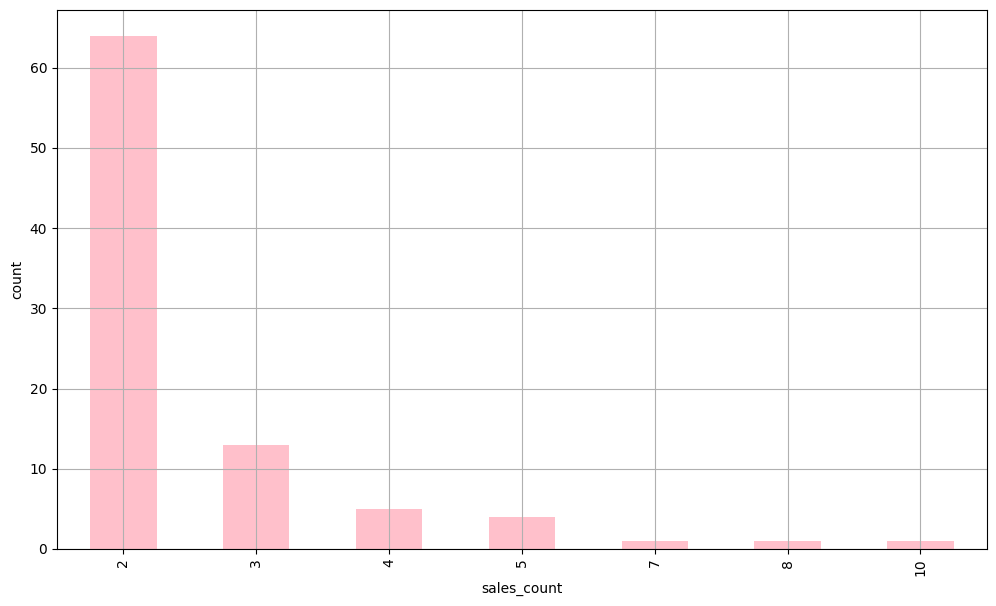

In [66]:
# We filter on invoicedate_purchase_duration greater than 0
summary_dfkds4 = summary_dfkds3.loc[summary_dfkds3['invoicedate_purchase_duration'] >= 0]

ax = summary_dfkds4.groupby('sales_count').count()['sales_avg'][:20].plot(kind='bar', color='pink',figsize=(12,7), grid=True)

ax.set_ylabel('count')

plt.show()

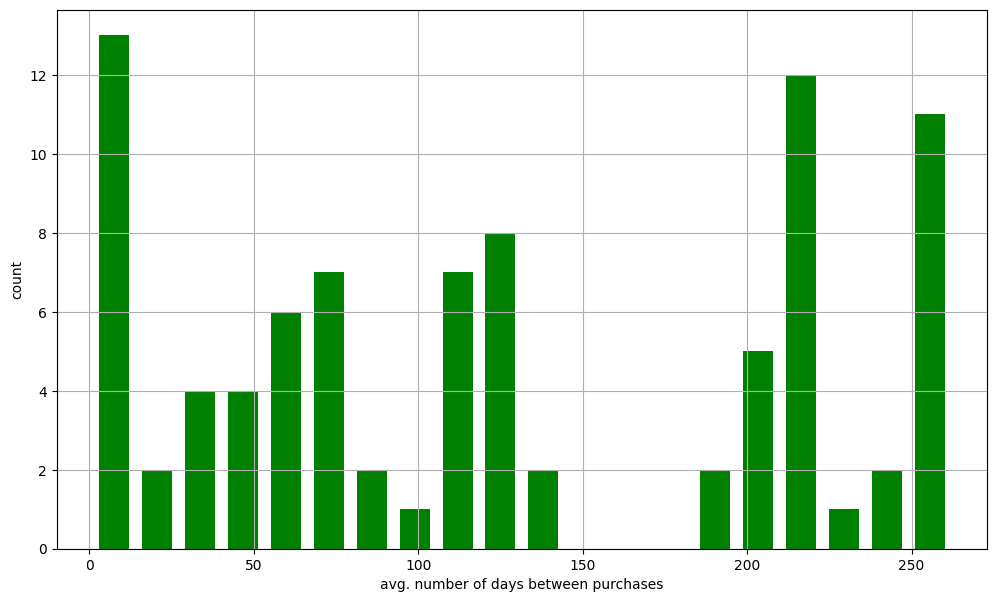

In [67]:
# Now we create a distribution for the average times between sales
ax = summary_dfkds4['invoicedate_purchase_duration'].hist(bins=20, color='green', rwidth=0.7, figsize=(12,7))

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

#Forecasting 4 month Customer Lifetime Value

In [68]:
orders_dfkds.head()

,,Sales,InvoiceDate
CustomerID,InvoiceNo,,
12348.0,541998,572000.0,2021-01-25 10:42:00
12359.0,C549955,-511940.0,2021-04-13 13:38:00
12360.0,563749,7646210.0,2021-08-19 10:10:00
12362.0,C563752,-255970.0,2021-08-19 10:38:00
12363.0,563947,3616470.0,2021-08-22 10:18:00


In [85]:
# Create summary statistics in 3 month intervals for customer Sales

# Use 4M for 4 month
clv_freq = '3M'

# Groupby customer ID now, and group all invoices for 4 month cycles.
# Aggregate on sum, mean and counts
data_df = orders_dfkds.reset_index().groupby(['CustomerID', pd.Grouper(key='InvoiceDate', freq=clv_freq)]).agg({
    'Sales': [sum, groupby_mean, groupby_count],})

data_df.columns = ['_'.join(col).lower() for col in data_df.columns]
data_df = data_df.reset_index()
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12348.0,2021-03-31,572000.0,572000.0,1
1,12359.0,2021-06-30,-511940.0,-511940.0,1
2,12360.0,2021-09-30,7646210.0,7646210.0,1
3,12362.0,2021-09-30,-255970.0,-255970.0,1
4,12363.0,2021-09-30,3616470.0,3616470.0,1


In [87]:
# Adding Recency 'M'

# Get the M
date_month_map = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True))}

# Create our M Column
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12348.0,2021-03-31,572000.0,572000.0,1,M_3
1,12359.0,2021-06-30,-511940.0,-511940.0,1,M_2
2,12360.0,2021-09-30,7646210.0,7646210.0,1,M_1
3,12362.0,2021-09-30,-255970.0,-255970.0,1,M_1
4,12363.0,2021-09-30,3616470.0,3616470.0,1,M_1


In [88]:
data_df['M'].unique()

array(['M_3', 'M_2', 'M_1', 'M_4'], dtype=object)

In [89]:
# Create our Features DF
features_df = pd.pivot_table(data_df.loc[data_df['M'] != 'M_1'], values=['sales_sum', 'sales_avg', 'sales_count'], columns='M', index='CustomerID')

features_df.columns = ['_'.join(col) for col in features_df.columns]

features_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4
CustomerID,,,,,,,,,
12348.0,NaN,572000.0,NaN,NaN,1.0,NaN,NaN,572000.0,NaN
12359.0,-511940.0,NaN,NaN,1.0,NaN,NaN,-511940.0,NaN,NaN
12370.0,NaN,NaN,178750.0,NaN,NaN,1.0,NaN,NaN,178750.0
12388.0,NaN,2420275.0,NaN,NaN,1.0,NaN,NaN,2420275.0,NaN
12433.0,NaN,NaN,2235090.0,NaN,NaN,1.0,NaN,NaN,2235090.0


In [90]:
# Create our Response DF
response_df = data_df.loc[data_df['M'] == 'M_1', ['CustomerID', 'sales_sum']]

response_df.columns = ['CustomerID', 'CLV_'+clv_freq]
response_df.head()

,CustomerID,CLV_3M
2,12360.0,7646210.0
3,12362.0,-255970.0
4,12363.0,3616470.0
5,12364.0,8922056.0
8,12395.0,2373085.0


In [91]:
# Create our Sample Set by merging features with response_df
sample_set_df = features_df.merge(
    response_df, 
    left_index=True, 
    right_on='CustomerID',
    how='left'
)

sample_set_df = sample_set_df.fillna(0)
sample_set_df

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,CustomerID,CLV_3M
NaN,0.0,572000.0,0.0,0.0,1.0,0.0,0.0,572000.0,0.0,12348.0,0.0
NaN,-511940.0,0.0,0.0,1.0,0.0,0.0,-511940.0,0.0,0.0,12359.0,0.0
NaN,0.0,0.0,178750.0,0.0,0.0,1.0,0.0,0.0,178750.0,12370.0,0.0
NaN,0.0,2420275.0,0.0,0.0,1.0,0.0,0.0,2420275.0,0.0,12388.0,0.0
NaN,0.0,0.0,2235090.0,0.0,0.0,1.0,0.0,0.0,2235090.0,12433.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
NaN,0.0,0.0,587730.0,0.0,0.0,1.0,0.0,0.0,587730.0,18239.0,0.0
NaN,0.0,0.0,248820.0,0.0,0.0,1.0,0.0,0.0,248820.0,18245.0,0.0
NaN,0.0,243100.0,0.0,0.0,1.0,0.0,0.0,243100.0,0.0,18250.0,0.0
NaN,6457594.0,0.0,0.0,1.0,0.0,0.0,6457594.0,0.0,0.0,18260.0,0.0


In [92]:
sample_set_df.shape

(460, 11)

#Using Linear Regression

In [93]:
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Our Target Variable
target_var = 'CLV_'+clv_freq

# Our Features
all_features = [x for x in sample_set_df.columns if x not in ['CUSTID', target_var]]

# Split data in Train and Test
x_train, x_test, y_train, y_test = train_test_split(sample_set_df[all_features], sample_set_df[target_var], test_size=0.4)

# Fit Model
reg_fit = LinearRegression()
reg_fit.fit(x_train, y_train)

LinearRegression()

In [94]:
# Get our y intercept
reg_fit.intercept_

337382.8338352687

In [95]:
# Get our coefficents
reg_fit.coef_

array([ 7.25842479e-02, -4.21024221e-01, -5.18089962e+00, -1.18817972e+05,
        1.71356247e+05, -2.21042240e+05, -5.38374123e-02,  4.15539172e-01,
        5.20948102e+00,  1.31672761e+01])

In [96]:
# Show them here per feature
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']

coef

,feature,coef
0,sales_avg_M_2,0.072584
1,sales_avg_M_3,-0.421024
2,sales_avg_M_4,-5.180900
3,sales_count_M_2,-118817.972337
4,sales_count_M_3,171356.247450
5,sales_count_M_4,-221042.239909
6,sales_sum_M_2,-0.053837
7,sales_sum_M_3,0.415539
8,sales_sum_M_4,5.209481
9,CustomerID,13.167276


In [97]:
# Run our input data into our model predictors
train_preds = reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

In [98]:
# Assess performance Training Data
from sklearn.metrics import r2_score, median_absolute_error

print(r2_score(y_true=y_train, y_pred=train_preds))
print(median_absolute_error(y_true=y_train, y_pred=train_preds))

0.06760009817809454
618641.4271843727


In [99]:
# Compare R-Squared Performance on Training and Test Datasets
print('In-Sample R-Squared: %0.4f' % r2_score(y_true = y_train, y_pred = train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true = y_test, y_pred = test_preds))

In-Sample R-Squared: 0.0676
Out-of-Sample R-Squared: -0.0000


In [100]:
# Compare MSE on Training and Test Datasets
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true = y_train, y_pred = train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true = y_test, y_pred = test_preds))

In-Sample MSE: 618641.4272
Out-of-Sample MSE: 560569.5026


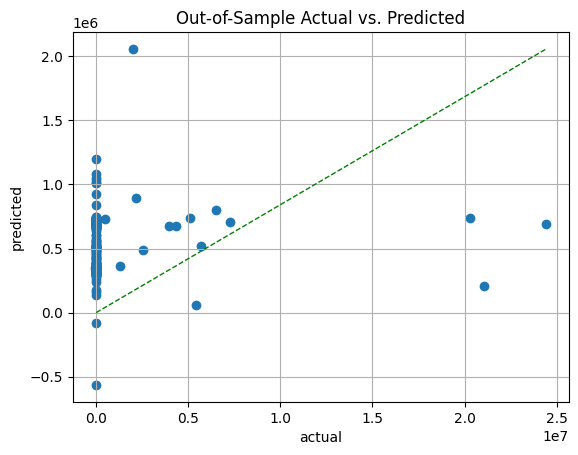

In [101]:
# Plot the predicted vs actual values using our Test Dataset
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='green', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()